## Bank Telemarketing Campaign Case Study.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [1]:
#importing  the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt , seaborn as sns
%matplotlib inline

## Session- 2, Data Cleaning 

In [3]:
#reading the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv('bank_marketing_updated_v1.csv')
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns 

#### Reading the file without unnecessary headers.

In [4]:
#reading the file in inp0 without first two rows as it is of no use.
inp0= pd.read_csv('bank_marketing_updated_v1.csv' , skiprows= 2)   

#skipping rows is a function to skip any no. of rows starting from index 0

In [5]:
#printing the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [6]:
#printing the information of variables to check their data types.
inp0.dtypes

customerid      int64
age           float64
salary          int64
balance         int64
marital        object
jobedu         object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration       object
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
dtype: object

#### Dropping customer id column. 

In [7]:
#drop the customer id as it is of no use.
inp0.drop('customerid' , axis = 1 , inplace = True)

#### Dividing "jobedu" column into job and education categories. 

In [8]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']= inp0.jobedu.apply(lambda x: x.split(',')[0])

In [9]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0.jobedu.apply(lambda x: x.split(',')[1])

In [10]:
#drop the "jobedu" column from the dataframe.
inp0.drop('jobedu' , axis = 1 , inplace = True)

In [11]:
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Checking the month column



In [12]:
inp0[inp0.month.apply(lambda x: isinstance(x , float) == True)] 

# isinstance function shows the mising values of any column of a dataset

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


### Segment- 4, Impute/Remove missing values 

#### handling missing values in age column.

In [13]:
inp0.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [14]:
#count the missing values in age column.
inp0.age.isnull().sum()

20

In [15]:
#pring the shape of dataframe inp0
inp0.shape

(45211, 19)

In [16]:
#calculate the percentage of missing values in age column.
20/45211 * 100

0.0442370219636814

###### Drop the records with age missing. 

In [17]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1= inp0[~inp0.age.isnull()]

In [18]:
inp1.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

#### handling missing values in month column

In [19]:
#count the missing values in month column in inp1.
inp1.month.isnull().sum()

50

In [20]:
#print the percentage of each month in the data frame inp1.
inp1.month.value_counts(normalize = True)

# The normalize=True parameter in the value_counts function is used to normalize the resulting counts by dividing them by the total number of observations.
# In other words, normalize=True scales the counts so that they represent the probability of each value occurring in the series.

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [21]:
#find the mode of month in inp1
month_mode = inp1.month.mode()[0]

In [22]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode , inplace = True)

In [23]:
#let's see the null values in the month column.
inp1.month.isnull().sum()

0

In [24]:
inp1.month.value_counts(normalize = True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [25]:
inp1.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

Made a mistake by coding inp1.fillna(month_mode , inplace = True)
to do further analysis, need to create another copy of the original dataframe.

#### handling missing values in response column 

In [26]:
# Creating another copy of the original

inp3 = inp0[~inp0.month.isnull()]
inp3.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [27]:
#count the missing values in response column in inp3.
inp3.response.isnull().sum()

30

In [28]:
inp3.shape

(45161, 19)

In [29]:
#calculate the percentage of missing values in response column. 
30/45161 * 100

0.06642899847213304

Target variable is better of not imputed.
- Drop the records with missing values.

In [30]:
#drop the records with response missings in inp3.
inp3 = inp3[~inp3.response.isnull()]

In [31]:
#calculate the missing values in each column of data frame: inp3.
inp3 = inp3[~inp3.age.isnull()]
inp3.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

#### handling pdays column. 

In [32]:
#describe the pdays column of inp3.
inp3.pdays.describe()

count    45111.000000
mean        40.193323
std        100.094574
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How Can we handle:

- we should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

#### Missing Values dont always have to be null. 


In [33]:
#describe the pdays column with considering the -1 values.

inp3.loc[inp3.pdays < 0 , 'pdays'] = np.NaN

In [34]:
inp3.pdays.describe()

count    8239.000000
mean      224.545819
std       115.226203
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Segment- 5, Handling Outliers 

#### Age variable 

In [35]:

inp3.age.describe()

count    45111.000000
mean        40.938352
std         10.619601
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

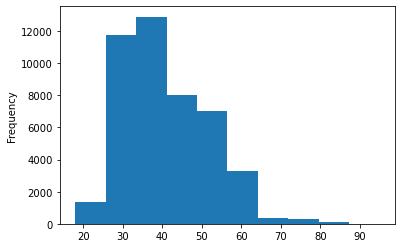

In [36]:

inp3.age.plot.hist()
plt.show()

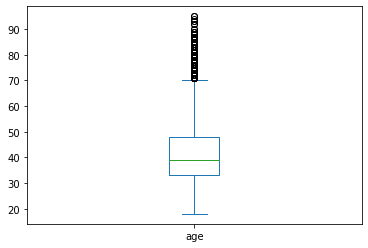

In [37]:

inp3.age.plot.box()
plt.show()

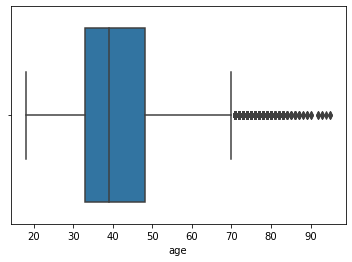

In [38]:
sns.boxplot(inp3.age)
plt.show()

#### Salary variable 

In [39]:
#describe the salary variable of inp1.
inp3.salary.describe()

count     45111.000000
mean      57005.785729
std       32090.324851
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

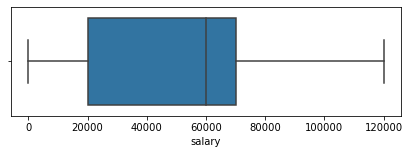

In [40]:
#plotting the boxplot of salary variable.
plt.figure(figsize = [7,2])
sns.boxplot(inp3.salary)
plt.show()

#### Balance variable 

In [41]:
#describe the balance variable of inp1.
inp3.balance.describe()

count     45111.000000
mean       1362.539647
std        3046.016714
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

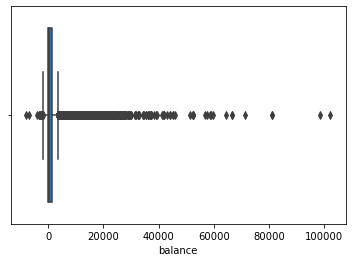

In [42]:
#plot the boxplot of balance variable.
sns.boxplot(inp3.balance)
plt.show()

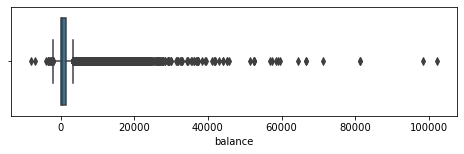

In [43]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize = [8,2])
sns.boxplot(inp3.balance)
plt.show()

In [44]:
#printing the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp3.balance.quantile([0.5 , 0.7 , 0.9 , 0.95 , 0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13164.9
Name: balance, dtype: float64

Instead of looking at mean , we could look at quantiles , medians , percentiles because none of the outliers
look suspicious

### Segment- 6, Standardising values 

#### Duration variable

In [45]:
#describe the duration variable of inp3.
inp3.duration.describe()


count       45111
unique       2644
top       1.5 min
freq          138
Name: duration, dtype: object

In [46]:
inp3.duration.head(5)

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
Name: duration, dtype: object

In [47]:
inp3.duration.dtype

dtype('O')

In [48]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp3.duration.apply(lambda x: float(x.split()[0]) / 60 if x.find('sec') > 0 else float(x.split()[0]))

0         4.350000
1         2.516667
2         1.266667
3         1.533333
4         3.300000
           ...    
45206    16.283333
45207     7.600000
45208    18.783333
45209     8.466667
45210     6.016667
Name: duration, Length: 45111, dtype: float64

In [49]:
#describe the duration variable
inp3.duration.describe()

count       45111
unique       2644
top       1.5 min
freq          138
Name: duration, dtype: object

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

#### Marital status 

In [50]:
inp3.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown


In [51]:
#calculate the percentage of each marital status category. 
inp3.marital.value_counts(normalize = True)

married     0.601937
single      0.282902
divorced    0.115160
Name: marital, dtype: float64

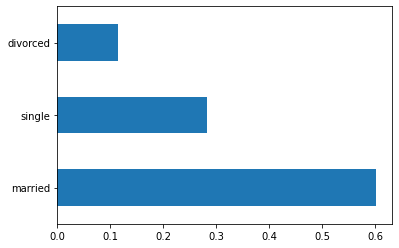

In [52]:
#plot the bar graph of percentage marital status categories
inp3.marital.value_counts(normalize = True).plot.barh()
plt.show()

#### Job  

In [53]:
#calculate the percentage of each job status category.
inp3.job.value_counts(normalize = True)

blue-collar      0.215313
management       0.209306
technician       0.168052
admin.           0.114362
services         0.091818
retired          0.050054
self-employed    0.034847
entrepreneur     0.032874
unemployed       0.028862
housemaid        0.027355
student          0.020771
unknown          0.006384
Name: job, dtype: float64

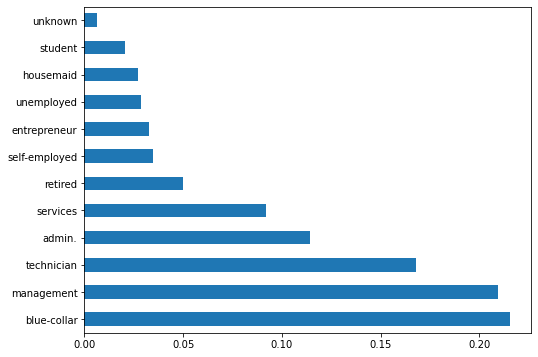

In [54]:
#plot the bar graph of percentage job categories
plt.figure(figsize = [8,6])
inp3.job.value_counts(normalize = True).plot.barh()
plt.show()

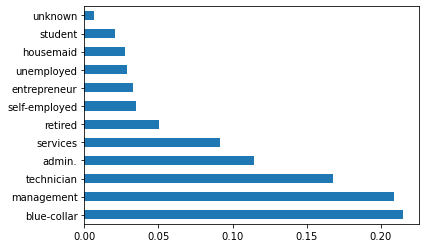

In [55]:
inp3.job.value_counts(normalize = True).plot.barh()
plt.show()

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

In [56]:
inp3.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown


#### Education

In [57]:
#calculate the percentage of each education category.
inp3.education.value_counts(normalize = True)

secondary    0.513445
tertiary     0.294119
primary      0.151404
unknown      0.041032
Name: education, dtype: float64

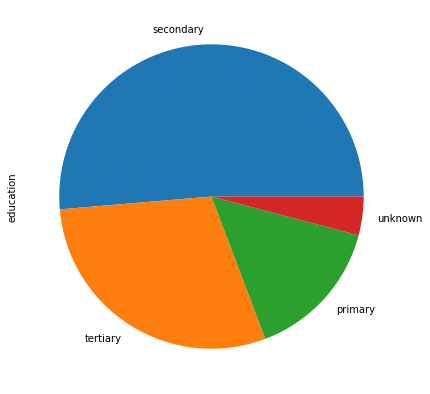

In [58]:
#plot the pie chart of education categories
plt.figure(figsize = [8,7])
inp3.education.value_counts(normalize = True).plot.pie()
plt.show()

#### poutcome 

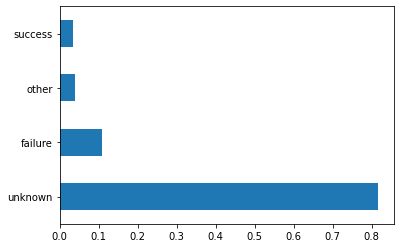

In [59]:
#calculate the percentage of each poutcome category.
inp3.poutcome.value_counts(normalize = True).plot.barh()
plt.show()

#### Response the target variable 

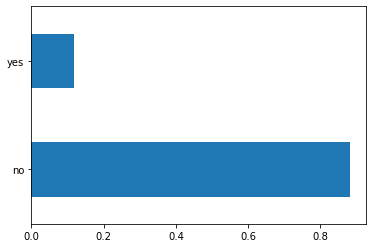

In [60]:
#calculate the percentage of each response category.
inp3.response.value_counts(normalize = True).plot.barh()
plt.show()

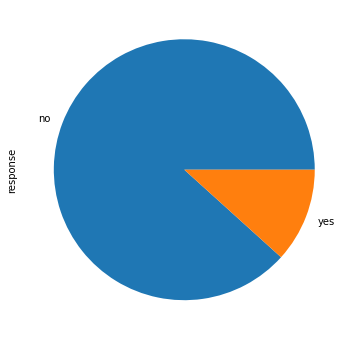

In [61]:
#plot the pie chart of response categories
plt.figure(figsize = [7,6])
inp3.response.value_counts(normalize = True).plot.pie()
plt.show()

## Session- 4, Bivariate and Multivariate Analysis

In [62]:
inp3.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown


### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

Descriptive Data Summary:
    
    . Median: Middle value of a set of Data. value at 50th percentile
    
    . Mean: Average value of a set of Data
    
    . Mode: Value that occurs most often in the data. Or the value with the highest 
            frequency
    
    . Standard Deviation: Measure of deviation of data points from the mean of the set
                          SD = sqrt(Variance)
    
    . Q1 Quantile: First Quantile or value at 25th percentile of the range
      Q3 Quantile: Third Quantile or value at 75th percentile of the range

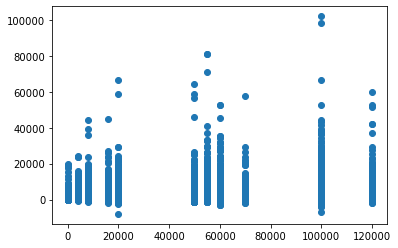

In [63]:
#plot the scatter plot of balance and salary variable in inp3
plt.scatter(inp3.salary , inp3.balance)
plt.show()

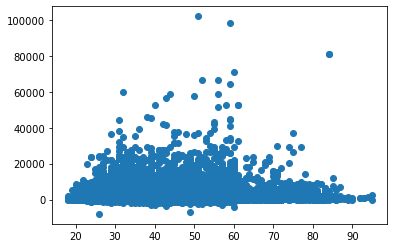

In [64]:
#plot the scatter plot of balance and age variable in inp3
plt.scatter(inp3.age,inp3.balance)
plt.show()

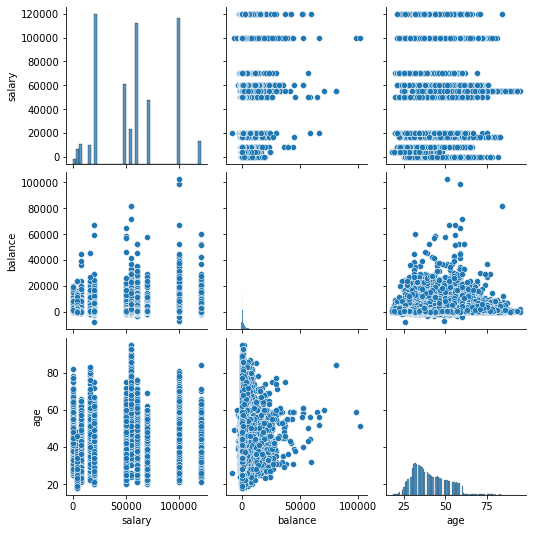

In [65]:
#plot the pair plot of salary, balance and age in inp3 dataframe.
sns.pairplot( data = inp3 , vars = ['salary' , 'balance' , 'age'])
plt.show()

#### Correlation heat map 

#### Quantify using Correlation values

In [66]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
inp3[['salary','balance','age']].corr()

,salary,balance,age
salary,1.000000,0.055207,0.024558
balance,0.055207,1.000000,0.097802
age,0.024558,0.097802,1.000000


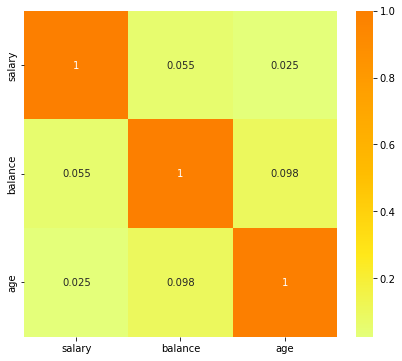

In [67]:
plt.figure(figsize = [7,6])
sns.heatmap(inp3[['salary' , 'balance' , 'age']].corr() , annot = True , cmap = 'Wistia')
plt.show()

### Segment- 4, Numerical categorical variable

Relationship between Categorical and Numerical variables 

#### Salary vs response 

In [68]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp3.groupby('response')['salary'].mean()

response
no     56771.917052
yes    58770.411063
Name: salary, dtype: float64

In [69]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp3.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

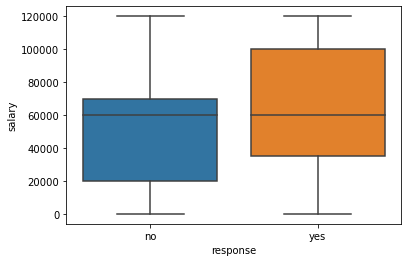

In [70]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(inp3.response , inp3.salary)
plt.show()


# From the graph above, it can be clearly seen that even though the mean and median values somewhere near, there is a clear difference in the salaries of the people that responded to 'yes' and 'no'

#### Balance vs response 

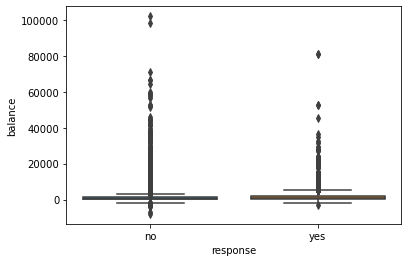

In [71]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(inp3.response , inp3.balance)
plt.show()

In [72]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp3.groupby('response')['balance'].mean()

response
no     1303.851376
yes    1805.364274
Name: balance, dtype: float64

In [73]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp3.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile 

In [74]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [75]:
#calculate the mean, median and 75th percentile of balance with response
inp3.groupby('response')['balance'].aggregate(['mean' , 'median' , p75])

,mean,median,p75
response,,,
no,1303.851376,417.0,1345.0
yes,1805.364274,733.0,2159.5


<AxesSubplot:ylabel='response'>

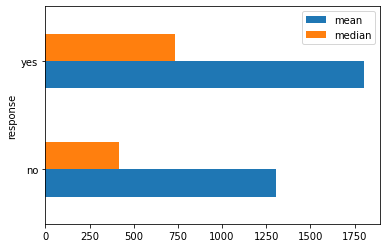

In [76]:
#plot the bar graph of balance's mean an median with response.
inp3.groupby('response')['balance'].aggregate(['mean' , 'median']).plot.barh()

#### Education vs salary 

In [77]:
#groupby the education to find the mean of the salary education category.
inp3.groupby('education')['salary'].mean()

education
primary      34235.285505
secondary    49731.024955
tertiary     82894.709074
unknown      46485.143166
Name: salary, dtype: float64

In [78]:
#groupby the education to find the median of the salary for each education category.
inp3.groupby('education')['salary'].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Job vs salary

In [79]:
#groupby the job to find the mean of the salary for each job category.
inp3.groupby('job')['salary'].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

### Segment- 5, Categorical categorical variable 

In [80]:
inp3.head(3)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary


#### Creation of response_flag

In [81]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp3['response_flag'] = np.where(inp3.response == 'yes', 1, 0)


In [82]:
inp3.response_flag.value_counts()

0    39832
1     5279
Name: response_flag, dtype: int64

In [83]:
# just to verify if creating the response flag worked
inp3.response.value_counts()

no     39832
yes     5279
Name: response, dtype: int64

In [84]:
inp3.response.value_counts(normalize = True)

no     0.882978
yes    0.117022
Name: response, dtype: float64

In [85]:
inp3.response_flag.mean()

0.11702245572033429

#### Education vs response rate

In [86]:
#calculate the mean of response_flag with different education categories.
inp3.groupby(['education'])['response_flag'].mean()

education
primary      0.086384
secondary    0.105647
tertiary     0.149985
unknown      0.136143
Name: response_flag, dtype: float64

#### Marital vs response rate 

In [87]:
#calculate the mean of response_flag with different marital status categories.
inp3.groupby(['marital'])['response_flag'].mean()

marital
divorced    0.119346
married     0.101311
single      0.149506
Name: response_flag, dtype: float64

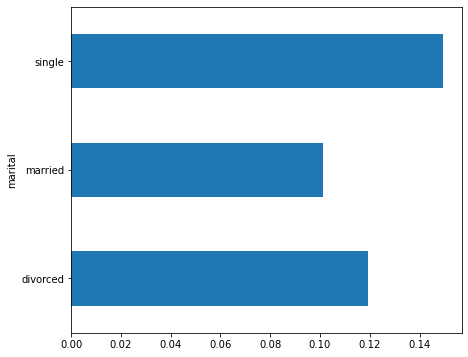

In [88]:
#plot the bar graph of marital status with average value of response_flag
plt.figure(figsize = [7,6])
inp3.groupby(['marital'])['response_flag'].mean().plot.barh()
plt.show()

#### Loans vs response rate 

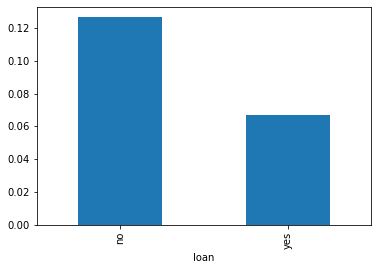

In [89]:
#plot the bar graph of personal loan status with average value of response_flag
inp3.groupby(['loan'])['response_flag'].mean().plot.bar()
plt.show()

#### Housing loans vs response rate 

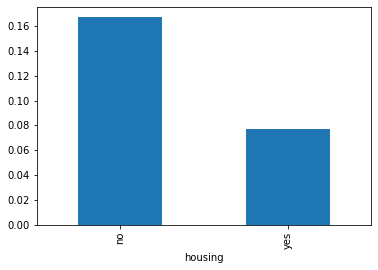

In [90]:
#plot the bar graph of housing loan status with average value of response_flag
inp3.groupby(['housing'])['response_flag'].mean().plot.bar()
plt.show()

#### Age vs response 

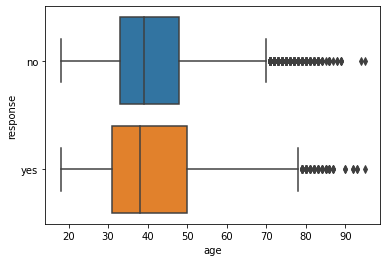

In [91]:
#plot the boxplot of age with response
sns.boxplot(inp3.age , inp3.response)
plt.show()

##### Making buckets from age columns 

In [92]:
?pd.cut

In [93]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
pd.cut( inp3.age[:5] , [0,30,40,50,60,999] , labels = ['<30' , '30-40' , '40-50' , '50-60' , '60+'])

0    50-60
1    40-50
2    30-40
3    40-50
4    30-40
Name: age, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [94]:
inp3.age.head()

0    58.0
1    44.0
2    33.0
3    47.0
4    33.0
Name: age, dtype: float64

In [100]:
inp3['age_group'] = pd.cut(inp3.age , [0,30,40,50,60,999] , labels = ['<30','30-40','40-50','50-60','60+'])

In [101]:
inp3.age_group.value_counts(normalize = True)

30-40    0.391035
40-50    0.248720
50-60    0.178427
<30      0.155527
60+      0.026291
Name: age_group, dtype: float64

#### In subplots() , while setting in the axes know that subplot( nrows =    , ncols =     ,  sharex = True , sharey = True)

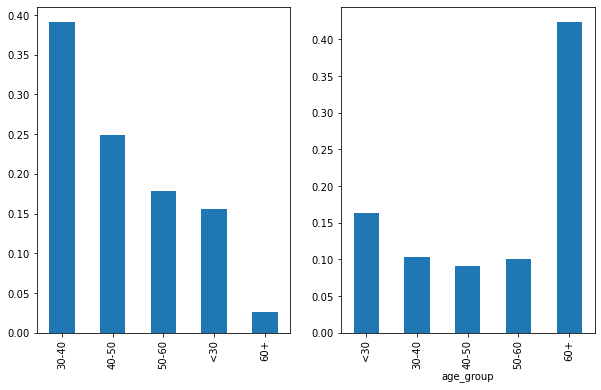

In [105]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize = [10,6])
plt.subplot(1,2,1)
inp3.age_group.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
inp3.groupby(['age_group'])['response_flag'].mean().plot.bar()
plt.show()


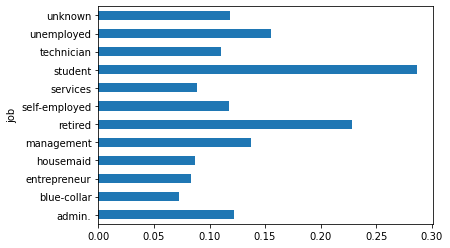

In [106]:
#plot the bar graph of job categories with response_flag mean value.
inp3.groupby('job')['response_flag'].mean().plot.barh()
plt.show()

### Segment-6, Multivariate analysis 

In [108]:
inp3.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag,age_group
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,...,261 sec,1,NaN,0,unknown,no,management,tertiary,0,50-60
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,...,151 sec,1,NaN,0,unknown,no,technician,secondary,0,40-50
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,...,76 sec,1,NaN,0,unknown,no,entrepreneur,secondary,0,30-40
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,...,92 sec,1,NaN,0,unknown,no,blue-collar,unknown,0,40-50
4,33.0,0,1,single,no,no,no,no,unknown,5,...,198 sec,1,NaN,0,unknown,no,unknown,unknown,0,30-40


#### More than two variables

In [109]:
res = pd.pivot_table(inp3 , index = 'education' , columns = 'marital' , values = 'response_flag')
res

marital,divorced,married,single
education,,,
primary,0.139037,0.075703,0.105758
secondary,0.103240,0.094718,0.129408
tertiary,0.137509,0.129735,0.183588
unknown,0.142012,0.122944,0.163188


#### Education vs marital vs response 

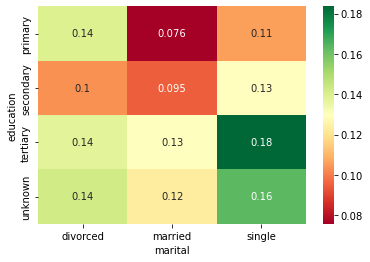

In [111]:
#create heat map of education vs marital vs response_flag
sns.heatmap(res , annot = True , cmap = 'RdYlGn' )
plt.show()

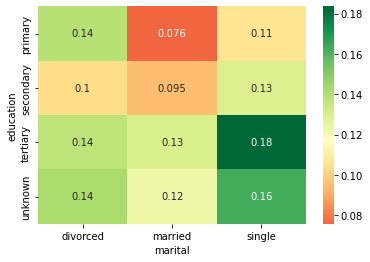

In [112]:
sns.heatmap( res , annot = True , cmap = 'RdYlGn' , center = 0.117)
plt.show()

#### Job vs marital vs response 

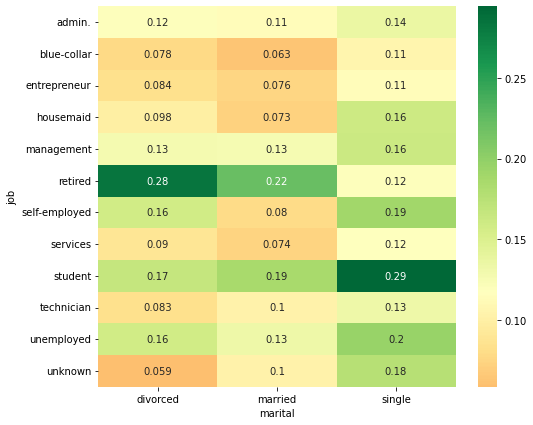

In [120]:
#create the heat map of Job vs marital vs response_flag.
plt.figure(figsize = [8,7])
rec = pd.pivot_table(inp3 , index = 'job' , columns = 'marital' , values = 'response_flag')
sns.heatmap(rec , annot = True , cmap = 'RdYlGn' , center = 0.117)
plt.show()

#### Education vs poutcome vs response

In [122]:
inp3.education.value_counts()

secondary    23162
tertiary     13268
primary       6830
unknown       1851
Name: education, dtype: int64

In [137]:
# Analysing pdays is required to find the center for the next question
inp3[inp3.pdays > 0].head(2)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag,age_group
24060,33.0,50000,882,married,yes,no,no,no,telephone,21,...,0.65 min,1,151.0,3,failure,no,admin.,tertiary,0,30-40
24062,42.0,50000,-247,single,yes,no,yes,yes,telephone,21,...,8.65 min,1,166.0,1,other,yes,admin.,secondary,1,40-50


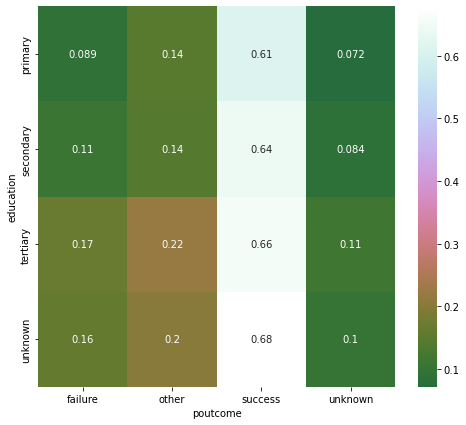

In [134]:
#create the heat map of education vs poutcome vs response_flag.
plt.figure(figsize = [8,7])
resh = pd.pivot_table(inp3 , index = 'education' , columns = 'poutcome' , values = 'response_flag')
sns.heatmap(resh , annot = True , cmap = 'cubehelix' , center = 0.2306)
plt.show()

In [133]:
inp3[inp3.pdays > 0].response_flag.mean()   # This would be the center

0.23061051098434276